In [1]:
import pandas as pd
import numpy as np
import os
import glob
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser# new installe via conda install -c conda-forge ipyfilechooser
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">code on/off</button>''', raw=True)

ModuleNotFoundError: No module named 'ipyfilechooser'

In [ ]:
print('Current working directory:',os.getcwd())

Interactive file selection:

In [2]:
fc = FileChooser('\\\\menloserver\\MFS\\03-Operations\\03-Production\\05-AU_PA\\AU07712-Pedro3-Zeiss\\52-Messergebnisse\\')
#fc = FileChooser()
display(fc)

NameError: name 'FileChooser' is not defined

In [21]:
print(fc.selected_path)

\\menloserver\MFS\03-Operations\03-Production\05-AU_PA\AU07712-Pedro3-Zeiss\52-Messergebnisse\pedro3_Messung_22°C_10V_10Veff_20V_20Veff_6.Durchlauf_2023-02-18_172807


In [22]:
datpath=fc.selected_path
os.chdir(datpath)
file_list = glob.glob( "*.dat") # Include slash or it will search in the wrong directory!!
print(len(file_list))
file_list

972


['raw-001-0001_Polarisation_U6-UI.dat',
 'raw-002-0002_Polarisation_U8-UI.dat',
 'raw-003-0003_Polarisation_U10-UI.dat',
 'raw-004-0004_Polarisation_U6-UI.dat',
 'raw-005-0005_Polarisation_U8-UI.dat',
 'raw-006-0006_Polarisation_U10-UI.dat',
 'raw-007-0007_Polarisation_U6-UI.dat',
 'raw-008-0008_Polarisation_U8-UI.dat',
 'raw-009-0009_Polarisation_U10-UI.dat',
 'raw-010-0001_PolarisationUeff0UPeak10-UI.dat',
 'raw-011-0002_Step1U10T1-UI.dat',
 'raw-012-0003_PolarisationUeff0UPeak10-UI.dat',
 'raw-013-0004_Step1U10T10-UI.dat',
 'raw-014-0005_PolarisationUeff0UPeak10-UI.dat',
 'raw-015-0006_Step1U10T100-UI.dat',
 'raw-016-0007_PolarisationUeff0UPeak10-UI.dat',
 'raw-017-0008_Step2U5u10T1-UI.dat',
 'raw-018-0009_PolarisationUeff0UPeak10-UI.dat',
 'raw-019-0010_Step2U5u10T10-UI.dat',
 'raw-020-0011_PolarisationUeff0UPeak10-UI.dat',
 'raw-021-0012_Step2U5u10T100-UI.dat',
 'raw-022-0013_PolarisationUeff0UPeak10-UI.dat',
 'raw-023-0014_Step1U10T1-UI.dat',
 'raw-024-0015_PolarisationUeff0UPeak

In [23]:
file_list = glob.glob( "*.dat") # Include slash or it will search in the wrong directory!!
print(len(file_list))
file_list

972


['raw-001-0001_Polarisation_U6-UI.dat',
 'raw-002-0002_Polarisation_U8-UI.dat',
 'raw-003-0003_Polarisation_U10-UI.dat',
 'raw-004-0004_Polarisation_U6-UI.dat',
 'raw-005-0005_Polarisation_U8-UI.dat',
 'raw-006-0006_Polarisation_U10-UI.dat',
 'raw-007-0007_Polarisation_U6-UI.dat',
 'raw-008-0008_Polarisation_U8-UI.dat',
 'raw-009-0009_Polarisation_U10-UI.dat',
 'raw-010-0001_PolarisationUeff0UPeak10-UI.dat',
 'raw-011-0002_Step1U10T1-UI.dat',
 'raw-012-0003_PolarisationUeff0UPeak10-UI.dat',
 'raw-013-0004_Step1U10T10-UI.dat',
 'raw-014-0005_PolarisationUeff0UPeak10-UI.dat',
 'raw-015-0006_Step1U10T100-UI.dat',
 'raw-016-0007_PolarisationUeff0UPeak10-UI.dat',
 'raw-017-0008_Step2U5u10T1-UI.dat',
 'raw-018-0009_PolarisationUeff0UPeak10-UI.dat',
 'raw-019-0010_Step2U5u10T10-UI.dat',
 'raw-020-0011_PolarisationUeff0UPeak10-UI.dat',
 'raw-021-0012_Step2U5u10T100-UI.dat',
 'raw-022-0013_PolarisationUeff0UPeak10-UI.dat',
 'raw-023-0014_Step1U10T1-UI.dat',
 'raw-024-0015_PolarisationUeff0UPeak

In [24]:
def trans(row):
    val=(row['f2/Hz'])
    return val

def f(x,deli):
    fn=datpath + '\\'+ x
    df=pd.read_csv(fn, comment='#', delimiter = deli, encoding = 'unicode_escape', header = None )
    columns=['t','f1/Hz','U1_fpga/V','f2/Hz','U2_fpga/V','U1/V','U2/V','Uawg/V']
    df.rename(columns={0:'t',1:'f1/Hz',2:'U1_fpga/V',3:'f2/Hz',4:'U2_fpga/V',5:'U1/V',6:'U2/V',7:'Uawg/V'}, inplace=True)
    print('Length of dta_frame: ', len(df))
    df_pm=df[['t','f2/Hz','U2/V']]
    faktor = 30*0.960/1000
    ref=df_pm.iloc[0,1]
    df_pm['s2/pm']=df_pm.apply(lambda row: (trans(row)-ref)*faktor,axis = 1)
    print('Reference freq.: ', ref)
    return df_pm

In [25]:
interact(f, x = file_list, deli =['\t'])

interactive(children=(Dropdown(description='x', options=('raw-001-0001_Polarisation_U6-UI.dat', 'raw-002-0002_…

<function __main__.f(x, deli)>

In [26]:
%matplotlib widget
import ipywidgets as widgets

interactive(children=(Dropdown(description='x', options=('raw-001-0001_Polarisation_U6-UI.dat', 'raw-002-0002_…

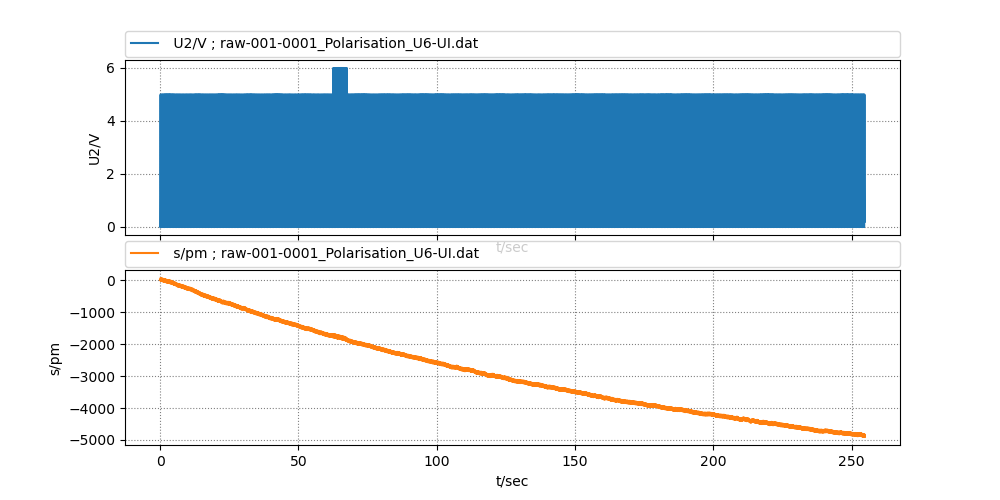

In [27]:
# set up plot
# https://stackoverflow.com/questions/45757260/matplotlibs-autoscale-doesnt-seem-to-work-on-y-axis-for-small-values
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
# https://stackoverflow.com/questions/50777849/from-conda-create-requirements-txt-for-pip3

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(10, 5),sharex=True)
#ax1.set_ylim([-4, 4])
ax1.grid(True,color='grey', linestyle='dotted')
ax2.grid(True,color='grey', linestyle='dotted')

def trans(row):
    val=(row['f2/Hz'])
    return val

def f(x):
    fn=datpath + '\\'+ x
    df=pd.read_csv(fn, comment='#', delimiter = '\t', encoding = 'unicode_escape', header = None )
    columns=['t','f1/Hz','U1_fpga/V','f2/Hz','U2_fpga/V','U1/V','U2/V','Uawg/V']
    df.rename(columns={0:'t',1:'f1/Hz',2:'U1_fpga/V',3:'f2/Hz',4:'U2_fpga/V',5:'U1/V',6:'U2/V',7:'Uawg/V'}, inplace=True)
    #print('Length of dta_frame: ', len(df))
    df_pm=df[['t','f2/Hz','U2/V']]
    faktor = 30*0.960/1000 #konversionsfaktor Hz --> pm
    ref=df_pm.iloc[0,1]# erster Frequenzwert ist Referenz = Nullauslenkung
    df_pm['s2/pm']=df_pm.apply(lambda row: (trans(row)-ref)*faktor,axis = 1)#neue Spalte Auslenkung s2 in pm skaliert
    #print('Reference freq.: ', ref)
    return df_pm #neuer dataframe mit s2/pm Spalte für Plot

@widgets.interact(x=file_list)
def update(x = file_list[0]):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax1.lines]#löscht alle Linien im ax1 Plot für neue Darstellung ohne Erzeugen eines neuen Plots
    [l.remove() for l in ax2.lines]#löscht alle Linien im ax2 Plot für neue Darstellung ohne Erzeugen eines neuen Plots
    x1=f(x)['t']
    y1=f(x)['U2/V']
    ax1.plot(x1,y1, color='C0',label=' U2/V ; {x}'.format(x=x))
    ax1.set(ylabel='U2/V',xlabel='t/sec')
    ax1.relim()# notwendig für für Reskalierung
    ax1.autoscale_view(True,True,True)# notwendig für Autoskalierung
    ax1.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode ="expand", borderaxespad=0)
    x2=f(x)['t']
    y2=f(x)['s2/pm']
    ax2.plot(x2,y2, color='C1',label=' s/pm ; {x}'.format(x=x))
    ax2.set(ylabel='s/pm', xlabel='t/sec')
    ax2.relim()# notwendig für für Reskalierung
    ax2.autoscale_view(True,True,True)# notwendig für Autoskalierung
    ax2.legend( bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode ="expand",borderaxespad=0)
    